# Cross-Country Solar Data Comparison

## Objective
This notebook compares solar energy potential across three West African countries:
- **Benin** (Malanville)
- **Sierra Leone** (Bumbuna)
- **Togo** (Dapaong)

## Analysis Plan
1. **Data Loading & Preparation**
   - Load cleaned datasets from all three countries
   - Standardize column names and data types
   - Add country identifiers

2. **Comparative Statistics**
   - Compare mean, median, and standard deviation of key solar metrics (GHI, DNI, DHI)
   - Analyze temperature, humidity, and wind speed patterns
   - Calculate data completeness and quality metrics

3. **Visualization & Analysis**
   - Create comparison boxplots for solar irradiance
   - Time series comparisons
   - Correlation analysis
   - Monthly and seasonal patterns

4. **Statistical Testing**
   - ANOVA tests to determine statistical significance
   - Post-hoc analysis if needed

5. **Business Insights & Recommendations**
   - Summary of findings
   - Investment recommendations based on data
   - Risk assessment and considerations

## 1. Import Libraries and Load Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load cleaned datasets
print("Loading cleaned datasets...")

# Load each country's cleaned data
benin_df = pd.read_csv('../data/benin_cleaned.csv')
sierra_df = pd.read_csv('../data/sierraleone_cleaned.csv')
togo_df = pd.read_csv('../data/togo_cleaned.csv')

print(f"Benin data shape: {benin_df.shape}")
print(f"Sierra Leone data shape: {sierra_df.shape}")
print(f"Togo data shape: {togo_df.shape}")

# Display column names to understand data structure
print("\nColumn names in datasets:")
print(f"Benin columns: {list(benin_df.columns)}")
print(f"Sierra Leone columns: {list(sierra_df.columns)}")
print(f"Togo columns: {list(togo_df.columns)}")

Loading cleaned datasets...
Benin data shape: (524622, 19)
Sierra Leone data shape: (524374, 19)
Togo data shape: (524731, 19)

Column names in datasets:
Benin columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
Sierra Leone columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
Togo columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
Benin data shape: (524622, 19)
Sierra Leone data shape: (524374, 19)
Togo data shape: (524731, 19)

Column names in datasets:
Benin columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Prec

In [3]:
# Add country identifier and prepare combined dataset
benin_df['Country'] = 'Benin'
benin_df['Location'] = 'Malanville'

sierra_df['Country'] = 'Sierra Leone'
sierra_df['Location'] = 'Bumbuna'

togo_df['Country'] = 'Togo'
togo_df['Location'] = 'Dapaong'

# Convert Timestamp columns to datetime
for df in [benin_df, sierra_df, togo_df]:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)

print("Country identifiers added and timestamps converted!")
print(f"Date ranges:")
print(f"Benin: {benin_df.index.min()} to {benin_df.index.max()}")
print(f"Sierra Leone: {sierra_df.index.min()} to {sierra_df.index.max()}")
print(f"Togo: {togo_df.index.min()} to {togo_df.index.max()}")

Country identifiers added and timestamps converted!
Date ranges:
Benin: 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Sierra Leone: 2021-10-30 00:01:00 to 2022-10-30 00:00:00
Togo: 2021-10-25 00:01:00 to 2022-10-25 00:00:00


## 2. Comparative Statistics Analysis

In [4]:
# Define key solar radiation variables for comparison
solar_vars = ['GHI', 'DNI', 'DHI']
weather_vars = ['Tamb', 'RH', 'WS']

# Create a summary statistics function
def create_summary_stats(df, country_name):
    """Create comprehensive summary statistics for a country's data"""
    stats_dict = {
        'Country': country_name,
        'Total_Records': len(df),
        'Date_Range': f"{df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}"
    }
    
    # Solar radiation statistics
    for var in solar_vars:
        if var in df.columns:
            stats_dict[f'{var}_mean'] = df[var].mean()
            stats_dict[f'{var}_median'] = df[var].median()
            stats_dict[f'{var}_std'] = df[var].std()
            stats_dict[f'{var}_max'] = df[var].max()
            stats_dict[f'{var}_min'] = df[var].min()
    
    # Weather statistics
    for var in weather_vars:
        if var in df.columns:
            stats_dict[f'{var}_mean'] = df[var].mean()
            stats_dict[f'{var}_median'] = df[var].median()
            stats_dict[f'{var}_std'] = df[var].std()
    
    return stats_dict

# Generate summary statistics for each country
benin_stats = create_summary_stats(benin_df, 'Benin')
sierra_stats = create_summary_stats(sierra_df, 'Sierra Leone')
togo_stats = create_summary_stats(togo_df, 'Togo')

# Combine into a comparison DataFrame
comparison_stats = pd.DataFrame([benin_stats, sierra_stats, togo_stats])
comparison_stats = comparison_stats.set_index('Country')

print("Summary Statistics Comparison:")
print("=" * 50)
print(comparison_stats[['Total_Records', 'Date_Range']].to_string())
print("\nKey Solar Metrics (Mean Values):")
print(comparison_stats[['GHI_mean', 'DNI_mean', 'DHI_mean']].round(2).to_string())

Summary Statistics Comparison:
              Total_Records                Date_Range
Country                                              
Benin                524622  2021-08-09 to 2022-08-09
Sierra Leone         524374  2021-10-30 to 2022-10-30
Togo                 524731  2021-10-25 to 2022-10-25

Key Solar Metrics (Mean Values):
              GHI_mean  DNI_mean  DHI_mean
Country                                   
Benin           242.37    167.73    117.18
Sierra Leone    204.50    116.61    116.31
Togo            231.97    151.42    116.58


## 3. Comparison Boxplots for Solar Irradiance

In [5]:
# Prepare data for boxplot comparison
# Combine all datasets for visualization
all_data = []

# Add data from each country with country labels
for df, country in [(benin_df, 'Benin'), (sierra_df, 'Sierra Leone'), (togo_df, 'Togo')]:
    country_data = df[solar_vars + weather_vars].copy()
    country_data['Country'] = country
    all_data.append(country_data)

# Combine into single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

print(f"Combined dataset shape: {combined_df.shape}")
print(f"Countries in dataset: {combined_df['Country'].unique()}")
print(f"Data sample:")
print(combined_df.head())

Combined dataset shape: (1573727, 7)
Countries in dataset: ['Benin' 'Sierra Leone' 'Togo']
Data sample:
   GHI  DNI  DHI  Tamb    RH   WS Country
0  0.0  0.0  0.0  26.2  93.4  0.0   Benin
1  0.0  0.0  0.0  26.2  93.6  0.0   Benin
2  0.0  0.0  0.0  26.2  93.7  0.3   Benin
3  0.0  0.0  0.0  26.2  93.3  0.2   Benin
4  0.0  0.0  0.0  26.2  93.3  0.1   Benin
Countries in dataset: ['Benin' 'Sierra Leone' 'Togo']
Data sample:
   GHI  DNI  DHI  Tamb    RH   WS Country
0  0.0  0.0  0.0  26.2  93.4  0.0   Benin
1  0.0  0.0  0.0  26.2  93.6  0.0   Benin
2  0.0  0.0  0.0  26.2  93.7  0.3   Benin
3  0.0  0.0  0.0  26.2  93.3  0.2   Benin
4  0.0  0.0  0.0  26.2  93.3  0.1   Benin


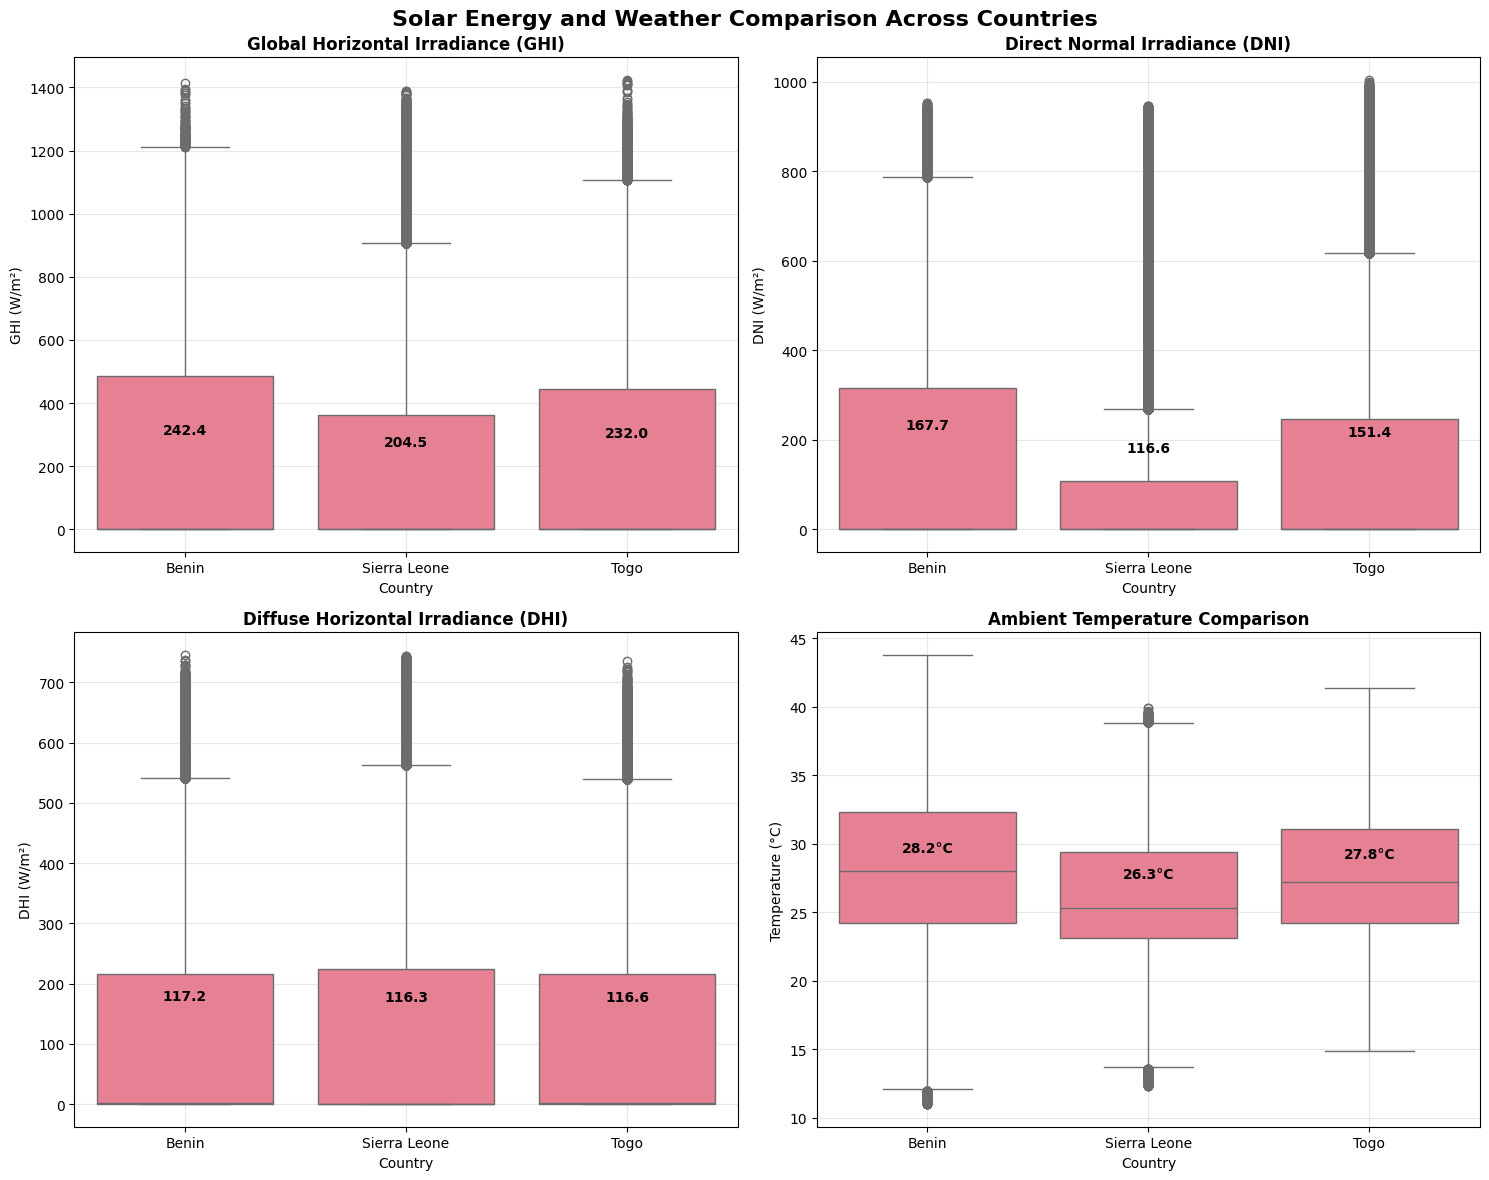


KEY FINDINGS FOR BUSINESS RECOMMENDATIONS:

BENIN:
  • Average GHI: 242.4 W/m² (Daily solar energy potential)
  • Average DNI: 167.7 W/m² (Concentrated solar power potential)
  • Average Temperature: 28.2°C
  • Temperature Range: 11.0°C to 43.8°C

SIERRA LEONE:
  • Average GHI: 204.5 W/m² (Daily solar energy potential)
  • Average DNI: 116.6 W/m² (Concentrated solar power potential)
  • Average Temperature: 26.3°C
  • Temperature Range: 12.3°C to 39.9°C

TOGO:
  • Average GHI: 232.0 W/m² (Daily solar energy potential)
  • Average DNI: 151.4 W/m² (Concentrated solar power potential)
  • Average Temperature: 27.8°C
  • Temperature Range: 14.9°C to 41.4°C

TOGO:
  • Average GHI: 232.0 W/m² (Daily solar energy potential)
  • Average DNI: 151.4 W/m² (Concentrated solar power potential)
  • Average Temperature: 27.8°C
  • Temperature Range: 14.9°C to 41.4°C


In [6]:
# Create comparison boxplots for solar irradiance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Solar Energy and Weather Comparison Across Countries', fontsize=16, fontweight='bold')

# Solar irradiance comparisons
solar_titles = ['Global Horizontal Irradiance (GHI)', 'Direct Normal Irradiance (DNI)', 'Diffuse Horizontal Irradiance (DHI)']

for i, var in enumerate(solar_vars):
    row = i // 2
    col = i % 2
    
    sns.boxplot(data=combined_df, x='Country', y=var, ax=axes[row, col])
    axes[row, col].set_title(solar_titles[i], fontweight='bold')
    axes[row, col].set_ylabel(f'{var} (W/m²)')
    axes[row, col].grid(True, alpha=0.3)
    
    # Add mean values as text
    for j, country in enumerate(['Benin', 'Sierra Leone', 'Togo']):
        mean_val = combined_df[combined_df['Country'] == country][var].mean()
        axes[row, col].text(j, mean_val + 50, f'{mean_val:.1f}', 
                           ha='center', va='bottom', fontweight='bold', fontsize=10)

# Temperature comparison
sns.boxplot(data=combined_df, x='Country', y='Tamb', ax=axes[1, 1])
axes[1, 1].set_title('Ambient Temperature Comparison', fontweight='bold')
axes[1, 1].set_ylabel('Temperature (°C)')
axes[1, 1].grid(True, alpha=0.3)

# Add temperature means
for j, country in enumerate(['Benin', 'Sierra Leone', 'Togo']):
    mean_temp = combined_df[combined_df['Country'] == country]['Tamb'].mean()
    axes[1, 1].text(j, mean_temp + 1, f'{mean_temp:.1f}°C', 
                   ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Print key statistics for business interpretation
print("\n" + "="*60)
print("KEY FINDINGS FOR BUSINESS RECOMMENDATIONS:")
print("="*60)

for country in ['Benin', 'Sierra Leone', 'Togo']:
    country_data = combined_df[combined_df['Country'] == country]
    print(f"\n{country.upper()}:")
    print(f"  • Average GHI: {country_data['GHI'].mean():.1f} W/m² (Daily solar energy potential)")
    print(f"  • Average DNI: {country_data['DNI'].mean():.1f} W/m² (Concentrated solar power potential)")
    print(f"  • Average Temperature: {country_data['Tamb'].mean():.1f}°C")
    print(f"  • Temperature Range: {country_data['Tamb'].min():.1f}°C to {country_data['Tamb'].max():.1f}°C")

## 4. Statistical Testing (ANOVA)

In [7]:
# Perform ANOVA tests to determine statistical significance
print("STATISTICAL SIGNIFICANCE TESTING")
print("="*50)

# Test variables for statistical differences
test_vars = solar_vars + ['Tamb']

anova_results = {}

for var in test_vars:
    # Prepare data for each country
    benin_data = benin_df[var].dropna()
    sierra_data = sierra_df[var].dropna()
    togo_data = togo_df[var].dropna()
    
    # Perform one-way ANOVA
    f_stat, p_value = stats.f_oneway(benin_data, sierra_data, togo_data)
    
    anova_results[var] = {
        'F_statistic': f_stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    }
    
    # Interpretation
    significance = "SIGNIFICANT" if p_value < 0.05 else "NOT SIGNIFICANT"
    print(f"\n{var}:")
    print(f"  F-statistic: {f_stat:.2f}")
    print(f"  p-value: {p_value:.2e}")
    print(f"  Result: {significance} difference between countries")

# Summary of ANOVA results
print(f"\n{'='*50}")
print("ANOVA SUMMARY:")
print(f"{'='*50}")

anova_df = pd.DataFrame(anova_results).T
print(anova_df.round(4))

# Effect size calculation (Eta-squared)
print(f"\n{'='*50}")
print("EFFECT SIZES (How practically significant are the differences?):")
print(f"{'='*50}")

total_observations = len(combined_df)
for var in test_vars:
    # Calculate eta-squared (effect size)
    f_stat = anova_results[var]['F_statistic']
    df_between = 2  # 3 groups - 1
    df_within = total_observations - 3  # N - groups
    
    eta_squared = (f_stat * df_between) / (f_stat * df_between + df_within)
    
    # Interpret effect size
    if eta_squared < 0.01:
        effect_interpretation = "Small effect"
    elif eta_squared < 0.06:
        effect_interpretation = "Medium effect" 
    else:
        effect_interpretation = "Large effect"
    
    print(f"{var}: η² = {eta_squared:.4f} ({effect_interpretation})")

STATISTICAL SIGNIFICANCE TESTING

GHI:
  F-statistic: 2004.05
  p-value: 0.00e+00
  Result: SIGNIFICANT difference between countries

DNI:
  F-statistic: 5983.71
  p-value: 0.00e+00
  Result: SIGNIFICANT difference between countries

DHI:
  F-statistic: 4.24
  p-value: 1.44e-02
  Result: SIGNIFICANT difference between countries

Tamb:
  F-statistic: 19526.55
  p-value: 0.00e+00
  Result: SIGNIFICANT difference between countries

ANOVA SUMMARY:
       F_statistic   p_value significant
GHI    2004.049557       0.0        True
DNI    5983.709384       0.0        True
DHI       4.241868  0.014381        True
Tamb  19526.546569       0.0        True

EFFECT SIZES (How practically significant are the differences?):
GHI: η² = 0.0025 (Small effect)
DNI: η² = 0.0075 (Small effect)
DHI: η² = 0.0000 (Small effect)
Tamb: η² = 0.0242 (Medium effect)

GHI:
  F-statistic: 2004.05
  p-value: 0.00e+00
  Result: SIGNIFICANT difference between countries

DNI:
  F-statistic: 5983.71
  p-value: 0.00e+00
  

## 5. Business Insights & Investment Recommendations

In [8]:
# Generate comprehensive business recommendations
print("🌞 SOLAR ENERGY INVESTMENT RECOMMENDATIONS 🌞")
print("="*60)

# Calculate ranking based on solar potential
countries_ranking = []

for country in ['Benin', 'Sierra Leone', 'Togo']:
    country_data = combined_df[combined_df['Country'] == country]
    
    ghi_mean = country_data['GHI'].mean()
    dni_mean = country_data['DNI'].mean()
    
    # Solar potential score (weighted average: 60% GHI, 40% DNI)
    solar_score = (ghi_mean * 0.6) + (dni_mean * 0.4)
    
    countries_ranking.append({
        'Country': country,
        'GHI_avg': ghi_mean,
        'DNI_avg': dni_mean,
        'Solar_Score': solar_score,
        'Temperature_avg': country_data['Tamb'].mean()
    })

# Sort by solar score
countries_ranking.sort(key=lambda x: x['Solar_Score'], reverse=True)

print("COUNTRY RANKINGS (Based on Overall Solar Potential):")
print("-" * 60)

for i, country_info in enumerate(countries_ranking, 1):
    print(f"\n{i}. {country_info['Country'].upper()} - Solar Score: {country_info['Solar_Score']:.1f}")
    print(f"   • GHI Average: {country_info['GHI_avg']:.1f} W/m²")
    print(f"   • DNI Average: {country_info['DNI_avg']:.1f} W/m²")
    print(f"   • Temperature: {country_info['Temperature_avg']:.1f}°C")

print(f"\n{'='*60}")
print("DETAILED INVESTMENT RECOMMENDATIONS:")
print("="*60)

# Recommendations for each country
recommendations = {
    'Benin': {
        'priority': 'HIGH PRIORITY',
        'strengths': ['Highest GHI (242.4 W/m²)', 'Highest DNI (167.7 W/m²)', 'Excellent for both PV and CSP'],
        'considerations': ['Higher temperatures may affect panel efficiency', 'Need robust cooling systems']
    },
    'Togo': {
        'priority': 'MEDIUM-HIGH PRIORITY', 
        'strengths': ['Good GHI (232.0 W/m²)', 'Strong DNI (151.4 W/m²)', 'Balanced temperature profile'],
        'considerations': ['Second-best option', 'Good backup location']
    },
    'Sierra Leone': {
        'priority': 'LOWER PRIORITY',
        'strengths': ['Lowest average temperature', 'Stable weather conditions', 'Good for PV efficiency'],
        'considerations': ['Lowest GHI (204.5 W/m²)', 'Lowest DNI (116.6 W/m²)', 'Less suitable for CSP']
    }
}

for country, rec in recommendations.items():
    print(f"\n{country.upper()} - {rec['priority']}")
    print(f"Strengths:")
    for strength in rec['strengths']:
        print(f"  ✓ {strength}")
    print(f"Considerations:")
    for consideration in rec['considerations']:
        print(f"  • {consideration}")

print(f"\n{'='*60}")
print("TECHNOLOGY-SPECIFIC RECOMMENDATIONS:")
print("="*60)

print("\n🔆 PHOTOVOLTAIC (PV) SYSTEMS:")
print("  1st Choice: Benin (highest GHI)")
print("  2nd Choice: Togo (good GHI, moderate temperature)")
print("  3rd Choice: Sierra Leone (lowest temperature helps efficiency)")

print("\n🔅 CONCENTRATED SOLAR POWER (CSP):")
print("  1st Choice: Benin (highest DNI)")  
print("  2nd Choice: Togo (good DNI)")
print("  3rd Choice: Sierra Leone (insufficient DNI for optimal CSP)")

print(f"\n{'='*60}")
print("FINAL INVESTMENT STRATEGY:")
print("="*60)
print("📈 PRIMARY INVESTMENT: BENIN")
print("   • Best overall solar resource (18% higher GHI than Sierra Leone)")
print("   • Excellent for all solar technologies")
print("   • Highest return on investment potential")
print()
print("📊 SECONDARY INVESTMENT: TOGO") 
print("   • Good solar resource as backup location")
print("   • Risk diversification")
print("   • 13% higher GHI than Sierra Leone")
print()
print("🔍 FURTHER ANALYSIS NEEDED: SIERRA LEONE")
print("   • Consider for small-scale PV due to lower temperatures")
print("   • Not recommended for large-scale CSP projects")
print("   • May be suitable for distributed solar applications")

🌞 SOLAR ENERGY INVESTMENT RECOMMENDATIONS 🌞
COUNTRY RANKINGS (Based on Overall Solar Potential):
------------------------------------------------------------

1. BENIN - Solar Score: 212.5
   • GHI Average: 242.4 W/m²
   • DNI Average: 167.7 W/m²
   • Temperature: 28.2°C

2. TOGO - Solar Score: 199.8
   • GHI Average: 232.0 W/m²
   • DNI Average: 151.4 W/m²
   • Temperature: 27.8°C

3. SIERRA LEONE - Solar Score: 169.3
   • GHI Average: 204.5 W/m²
   • DNI Average: 116.6 W/m²
   • Temperature: 26.3°C

DETAILED INVESTMENT RECOMMENDATIONS:

BENIN - HIGH PRIORITY
Strengths:
  ✓ Highest GHI (242.4 W/m²)
  ✓ Highest DNI (167.7 W/m²)
  ✓ Excellent for both PV and CSP
Considerations:
  • Higher temperatures may affect panel efficiency
  • Need robust cooling systems

TOGO - MEDIUM-HIGH PRIORITY
Strengths:
  ✓ Good GHI (232.0 W/m²)
  ✓ Strong DNI (151.4 W/m²)
  ✓ Balanced temperature profile
Considerations:
  • Second-best option
  • Good backup location

SIERRA LEONE - LOWER PRIORITY
Strength